In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")


## Read From Dataset 

In [4]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check Datatypes

In [6]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes":dtypes , "N-unique":n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
N-unique,47,2,548,6,2,4,1337


In [7]:
cat_cols = ["sex" , "children" , "smoker" , "region"]
df[cat_cols] = df[cat_cols].astype("category")

## Check NUll Values

In [10]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


## Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

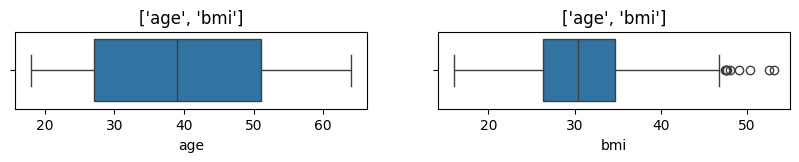

In [13]:
num_cols = ["age","bmi"]
plt.figure(figsize=(10,1))

for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{num_cols}")
    sns.boxplot(df[col],orient='h')
plt.show

In [14]:
Q1 = df.bmi.quantile(.25)
Q3 = df.bmi.quantile(.75)

IQR =Q3 - Q1
upper = Q3 + 1.5 *IQR
outliers = df[df.bmi > upper].bmi.values
df.bmi.replace(outliers , upper , inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

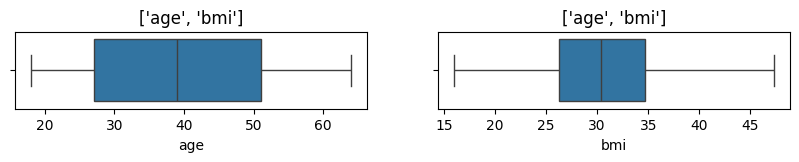

In [15]:
num_cols = ["age","bmi"]
plt.figure(figsize=(10,1))

for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{num_cols}")
    sns.boxplot(df[col],orient='h')
plt.show

## Duplicates

In [17]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first" , inplace=True)
print(df.duplicated().sum())

1
0


## Visualizations

In [ ]:
num_cols = ['age','bmi']
cat_cols = ["sex" , "children","smoker","region"]


## Check Relations Between Each Features & Traget

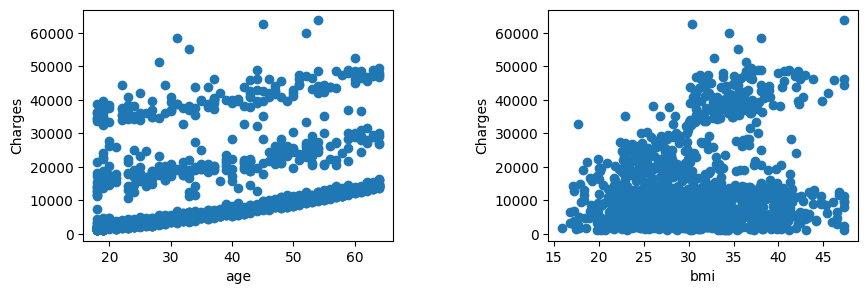

In [23]:
plt.figure(figsize=(10,3))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    plt.scatter(df[col], df.charges)
plt.subplots_adjust(hspace=0.5 , wspace=0.5)
plt.show()

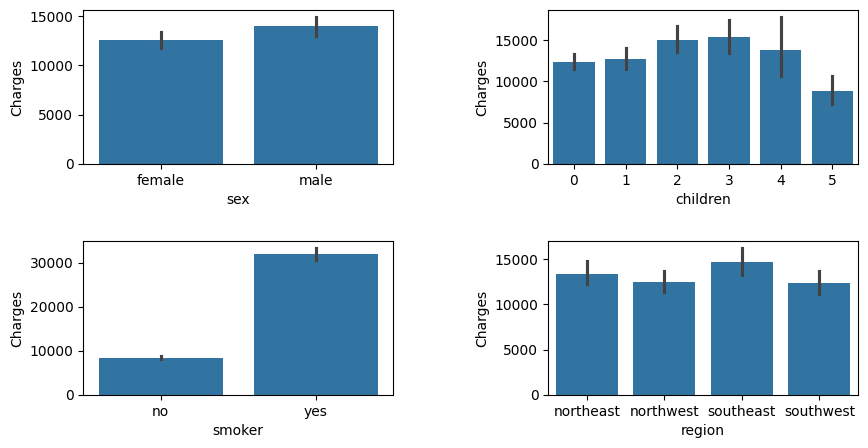

In [32]:
plt.figure(figsize=(10,5))
for i , col in enumerate (cat_cols):
    plt.subplot(2,2,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    sns.barplot(x=col , y="charges" , data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

## Check Variation

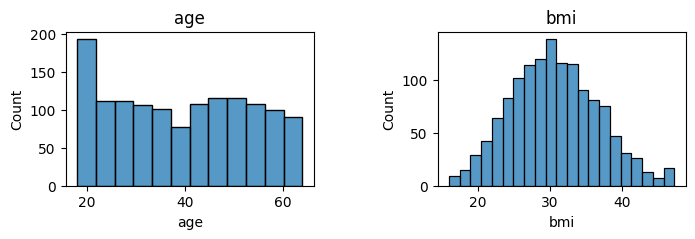

In [26]:
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

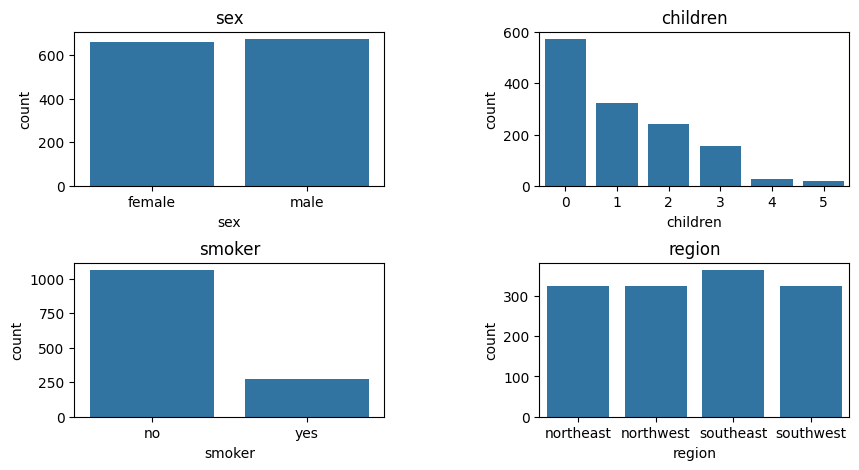

In [33]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.title(f"{col}")
    sns.countplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

## Duplicates

In [34]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

0
0


## Spliting Data

In [35]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1:]

## Normliaztion

In [39]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = x.select_dtypes("number").columns
scaler = MinMaxScaler()

In [40]:
x[cols_to_norm] = scaler.fit_transform(x[cols_to_norm])

## Encoding

In [42]:
pd.DataFrame({"Dtype":x.dtypes , "Num_Unique":x.nunique()}).T

,age,sex,bmi,children,smoker,region
Dtype,float64,category,float64,category,category,category
Num_Unique,47,2,540,6,2,4
